In [1]:
import warnings
warnings.filterwarnings('ignore')
from transformers import (
    LlamaForCausalLM,
    pipeline,
    AutoTokenizer,AutoModelForCausalLM,
    LlamaModel,AutoModel,
    LlamaConfig, Qwen2VLForConditionalGeneration,
    BertTokenizer, BertModel
)
import transformers
import json
from datasets import load_dataset
import torch
from langchain import PromptTemplate, LLMChain
from langchain.llms import HuggingFacePipeline

In [2]:
model_dir = "/data/Models/bert-base-cased"
dataset_dir = "/data/Datasets/nyu-mll_glue"

In [3]:
model_dir = "/data/Models/bert-large-cased"
dataset_dir = "/data/Datasets/nyu-mll_glue"

In [4]:
# 加载 GLUE 数据集，默认为 'sst2' 任务，可以换成其他任务如 'mnli'、'qqp' 等
dataset = load_dataset(dataset_dir, "cola")
# 获取测试集
test_set = dataset["test"]
# 打印测试集的前10条数据
# test_set
# for i in range(10):
#     print(test_set[i])
test_sentences = [test_set[i]['sentence'] for i in range(30)]
# test_sentences

In [5]:
intermediate_outputs = {}

In [6]:
def hook_func(module, inputs, outputs, layer_idx):
    intermediate_outputs[layer_idx] = outputs[0]

In [7]:
tokenizer = BertTokenizer.from_pretrained(model_dir)
bert_model = BertModel.from_pretrained(
    model_dir,
)

In [8]:
bert_model.config

BertConfig {
  "_attn_implementation_autoset": true,
  "_name_or_path": "/data/Models/bert-large-cased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "directionality": "bidi",
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 1024,
  "initializer_range": 0.02,
  "intermediate_size": 4096,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 16,
  "num_hidden_layers": 24,
  "pad_token_id": 0,
  "pooler_fc_size": 768,
  "pooler_num_attention_heads": 12,
  "pooler_num_fc_layers": 3,
  "pooler_size_per_head": 128,
  "pooler_type": "first_token_transform",
  "position_embedding_type": "absolute",
  "torch_dtype": "float32",
  "transformers_version": "4.49.0",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 28996
}

In [9]:
for layer_idx, layer in enumerate(bert_model.encoder.layer):
    layer.register_forward_hook(
        lambda m, inp, out, idx=layer_idx: hook_func(m, inp, out, idx)
    )

In [10]:
text = "Replace me by any text you'd like."
# test_sentences = [
#     "Replace me by any text you'd like.",
#     "One apple one day, keep the doctor away",
#     "What is the captial of China"
# ]
input_ids = tokenizer(test_sentences, padding=True, truncation=True, return_tensors="pt").input_ids
# input_ids
# output = model(**encoded_input)

In [11]:
with torch.no_grad():
    bert_out = bert_model(input_ids)
# bert_out

We strongly recommend passing in an `attention_mask` since your input_ids may be padded. See https://huggingface.co/docs/transformers/troubleshooting#incorrect-output-when-padding-tokens-arent-masked.


In [12]:
# for layer_idx, tensor in intermediate_outputs.items():
#     print(f"Layer {layer_idx}: {tensor.shape}")

In [13]:
intermediate_outputs[0][:,0,:].shape

torch.Size([30, 1024])

In [14]:
len(bert_model.encoder.layer)

24

## Zero-dimension Persistent Homology

In [15]:
import numpy as np
import scipy.spatial.distance as dist
import gudhi as gd
import matplotlib.pyplot as plt
from persim import plot_diagrams
from ripser import ripser
from ripser import Rips
import persim

## Zero-dimension Persistent Homology Official Implement

In [16]:
def compute_rf_vr(pm_data):
    rips = Rips(maxdim=2)
    dgm = rips.fit_transform(pm_data)
    H0 = dgm[0][:-1]
    if len(H0) > 1:
        r_f = np.max(H0[:, 1])  # 取最大的死亡时间（即最小连通分量合并半径）
    else:
        r_f = 0  # 如果只有一个分量，说明已经连通
    return r_f, dgm

Rips(maxdim=2, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


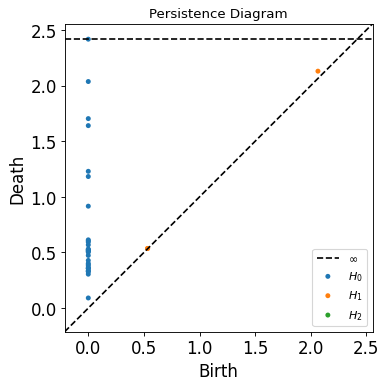

In [17]:
pm_data = np.array(intermediate_outputs[0][:,0,:])

# Instantiate Vietoris-Rips solver
rips = Rips(maxdim=2)
dgm = rips.fit_transform( pm_data)

plt.figure(figsize=(5, 5), dpi=80)
plt.rcParams.update({'font.size': 15})
persim.plot_diagrams(dgm, title="Persistence Diagram")
# print(f"rips.r_cover_ is ... {rips.r_cover_}")
# plt.savefig("homology_example_persistence-diagram.png", dpi='figure', format=None, metadata=None,
#         bbox_inches=None, pad_inches=0.1,
#         facecolor='white', edgecolor='auto')

In [18]:
r_f_list = []
for layer_idx, tensor in intermediate_outputs.items():
    # 计算最小半径
    r_f, _ = compute_rf_vr(tensor[:, 0, :])
    r_f_list.append(r_f)
    # print(f"Layer {layer_idx} -- radis -- {r_f}")

Rips(maxdim=2, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)
Rips(maxdim=2, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)
Rips(maxdim=2, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)
Rips(maxdim=2, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)
Rips(maxdim=2, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)
Rips(maxdim=2, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)
Rips(maxdim=2, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)
Rips(maxdim=2, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)
Rips(maxdim=2, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)
Rips(maxdim=2, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)
Rips(maxdim=2, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)
Rips(maxdim=2, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbos

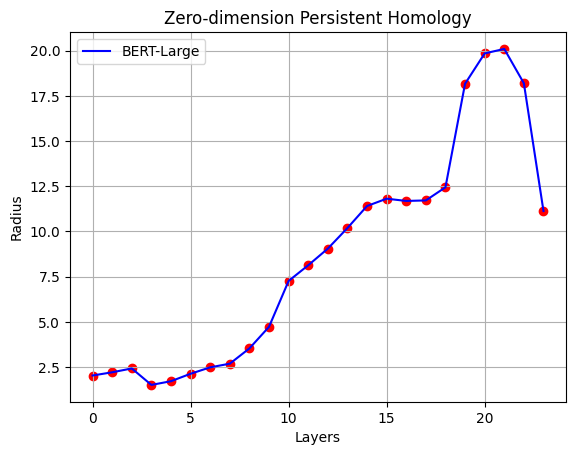

In [19]:
#---------------------------------------------------------------------------------------------------
p_num = len(bert_model.encoder.layer)
x = np.linspace(0, p_num, 1)  # 在 0 到 10 之间生成 100 个等间距的点
x = np.arange(p_num)
y = r_f_list  

plt.plot(x, y, label="BERT-Large", color='b', linestyle='-')
plt.scatter(x, y, color='r', marker='o')
plt.title("Zero-dimension Persistent Homology")
plt.xlabel("Layers")
plt.ylabel("Radius")

plt.grid(True)
plt.legend()
plt.show()

## ChatGPT-based VR complex computation

In [20]:
# def compute_min_radius_vr(vectors):
#     """
#     计算基于 Vietoris-Rips 复形，使所有向量最终合并为一个连通分量的最小半径 r_f。
#     """
#     # 计算欧几里得距离矩阵
#     distance_matrix = dist.pdist(vectors, metric='euclidean')
    
#     # 转换为方阵形式
#     distance_matrix = dist.squareform(distance_matrix)
    
#     # 构造 VR 复形
#     rips_complex = gd.RipsComplex(distance_matrix=distance_matrix)
#     simplex_tree = rips_complex.create_simplex_tree(max_dimension=1)
    
#     # 获取所有 1-维单纯形（边）的死亡时间，即当它们形成连通分量时的最大半径
#     edges = [simplex for simplex in simplex_tree.get_filtration() if len(simplex[0]) == 2]
#     # 找到形成单一连通分量的最小半径 r_f
#     r_f = max(edge[1] for edge in edges)
#     return r_f

In [21]:
# r_f_list = []
# for layer_idx, tensor in intermediate_outputs.items():
#     # 计算最小半径
#     r_f = compute_min_radius_vr(tensor[:, 0, :])
#     r_f_list.append(r_f)
#     # print(f"Layer {layer_idx} -- radis -- {r_f}")
    
# #---------------------------------------------------------------------------------------------------
# p_num = len(bert_model.encoder.layer)
# x = np.linspace(0, p_num, 1)  # 在 0 到 10 之间生成 100 个等间距的点
# x = np.arange(p_num)
# y = r_f_list  

# plt.plot(x, y, label="BERT-Base", color='b', linestyle='-')
# plt.scatter(x, y, color='r', marker='o')
# plt.title("Zero-dimension Persistent Homology")
# plt.xlabel("Layers")
# plt.ylabel("Radius")

# plt.grid(True)
# plt.legend()
# plt.show()

In [22]:
# points = intermediate_outputs[0][:,0,:]

# distance_matrix = dist.squareform(dist.pdist(points, metric='euclidean'))
# # 构造 VR 复形
# rips_complex = gd.RipsComplex(distance_matrix=distance_matrix)
# simplex_tree = rips_complex.create_simplex_tree(max_dimension=1)

# # 获取所有 1-维单纯形（边）的死亡时间，即当它们形成连通分量时的最大半径
# edges = [simplex for simplex in simplex_tree.get_filtration() if len(simplex[0]) == 2]
# homology = np.array([(0, edge[1]) for edge in edges])
# # 找到形成单一连通分量的最小半径 r_f
# r_f = max(edge[1] for edge in edges)

# print(f"Vietoris-Rips 复形计算的最小连通半径 r_f: {r_f:.4f}")

# # 绘制 Birth-Death 持续同调图
# # plt.figure(figsize=(8, 6))
# plot_diagrams([homology], show=True, title="0-Persistent Homology Birth-Death Diagram")
# # plt.axhline(y=r_f, color='r', linestyle='--', label=f"r_f = {r_f:.4f}")
# # plt.legend()
# # plt.show()
# homology

In [23]:
# points = intermediate_outputs[0][:,0,:]

# distance_matrix = dist.squareform(dist.pdist(points, metric='euclidean'))
# result = ripser(distance_matrix, maxdim=0, distance_matrix=True, metric='euclidean')
# diagrams = result['dgms']  # 获取生死图数据
# plot_diagrams(diagrams, show=True)

# min_connect_radius=np.max(diagrams[0][:, 1])
# min_connect_radius